![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_5_6_EXERCISES.ipynb)

In [ ]:
%matplotlib inline

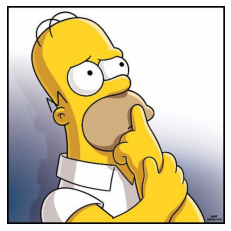

In [5]:
import imageio
import matplotlib.pyplot as plt
h = imageio.imread('homer.jpg')

plt.imshow(h)
plt.axis("off")
plt.show()

In [101]:
gray_h = h[:,:,0]

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

In [ ]:
# Crop the image

In [8]:
h.shape

(400, 400, 3)

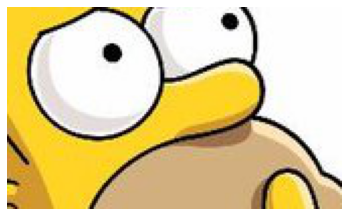

In [59]:
bx, by, _ = h.shape

crop_b = h[bx//4:-bx//2, by//4:-by//3]

plt.figure(figsize=(6, 6))
plt.imshow(crop_b)
plt.axis('off')

plt.show()

In [ ]:
# Smoothen the image with a kernel filter.

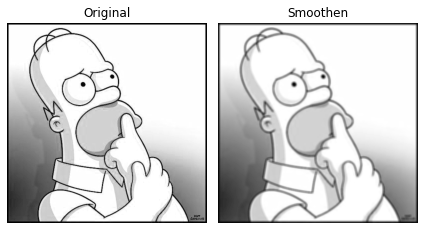

In [317]:
kernel = np.ones((5,5))/25
filtered = ndimage.convolve(gray_h, kernel, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(6, 6))

ax[0].imshow(gray_h, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Smoothen')

for i in range(2):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Sharpen the image with a kernel filter

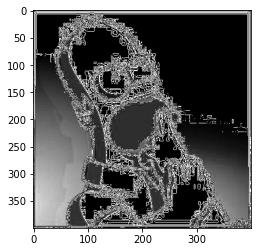

In [282]:
kernel = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered = ndimage.convolve(gray_h, kernel, mode='mirror', cval=0.0)


plt.imshow(filtered, cmap=plt.cm.binary)

In [ ]:
# Find the edges of the image with at least two different methods.

In [95]:
import numpy as np

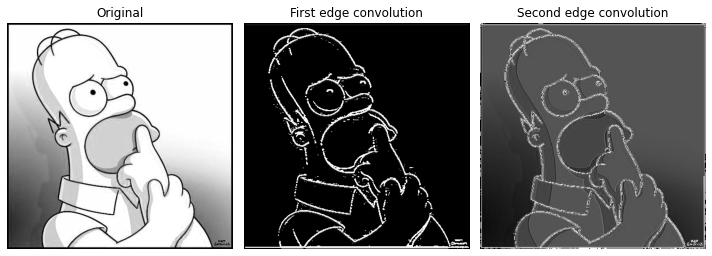

In [318]:
kernel = np.array([ [1, 1, 1], 
                    [0, 0, 0], 
                    [-1, -1, -1]]) / 27

kernel1 = np.array([ [-1, 0, 0], 
                    [-1, 5, -1], 
                    [-1, 0, 0]]) / 3

filtered = ndimage.convolve(gray_h, kernel, mode='mirror', cval=0.0)
filtered1 = ndimage.convolve(gray_h, kernel1, mode='mirror', cval=0.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(gray_h, cmap=plt.cm.gray)
ax[0].set_title('Original')


ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('First edge convolution')


ax[2].imshow(filtered1, cmap=plt.cm.gray)
ax[2].set_title('Second edge convolution')

for i in range(3):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# From the processes above, save the image that you prefer as a .jpg

In [191]:
imageio.imwrite("edge_h.jpg", filtered)
imageio.imwrite("edge_h1.jpg", filtered1)

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

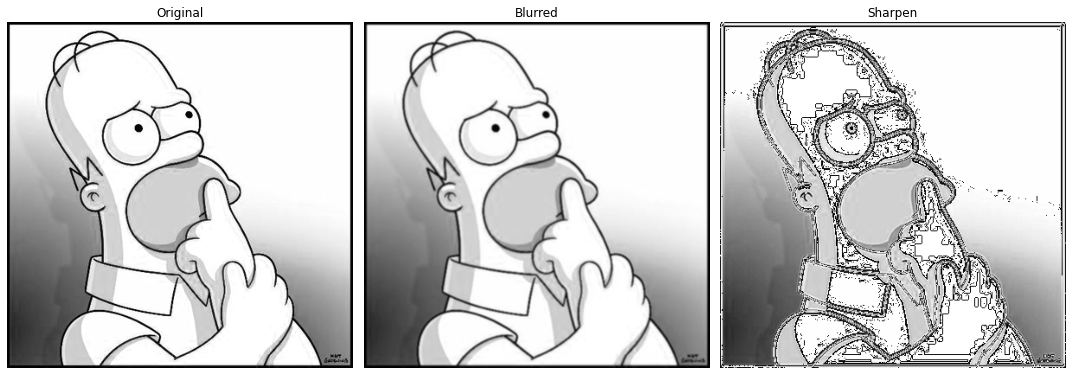

In [326]:
kernel = np.array([ [1/16,2/16,1/16], 
                    [2/16,4/16,2/16], 
                    [1/16,2/16,1/16]]) 

blurred = ndimage.convolve(gray_h, kernel, mode='mirror', cval=0.0)



# making an image sharpening from blurred 
kernel1 = np.array([ [0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

Sharpen = ndimage.convolve(blurred, kernel1, mode='mirror', cval=0.0)



fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(15, 15))

ax[0].imshow(gray_h, cmap=plt.cm.gray)
ax[0].set_title('Original')


ax[1].imshow(blurred, cmap=plt.cm.gray)
ax[1].set_title('Blurred')


ax[2].imshow(Sharpen, cmap=plt.cm.gray)
ax[2].set_title('Sharpen')

for i in range(3):
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

In [84]:
from skimage.io import imread, imshow
from skimage.exposure import histogram

import matplotlib.pyplot as plt

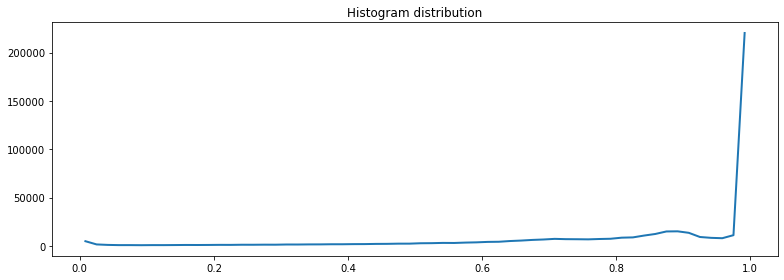

In [85]:
coins = imread("dd139.jpeg", as_gray=True)

# Histogram
hist, bin_edges = np.histogram(coins, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

# Plotting histogram
fig, ax = plt.subplots(ncols=1, sharex=True, sharey=True,
                       figsize=(11, 4))

ax.plot(bin_centers, hist, lw=2)
ax.set_title('Histogram distribution')

plt.tight_layout()
plt.show()

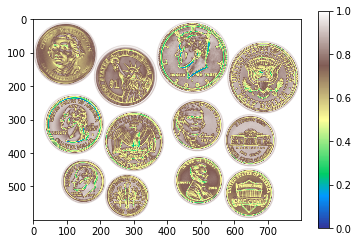

In [86]:
import matplotlib.pyplot as plt
plt.imshow(coins, cmap=plt.cm.terrain)
plt.colorbar()
plt.show()

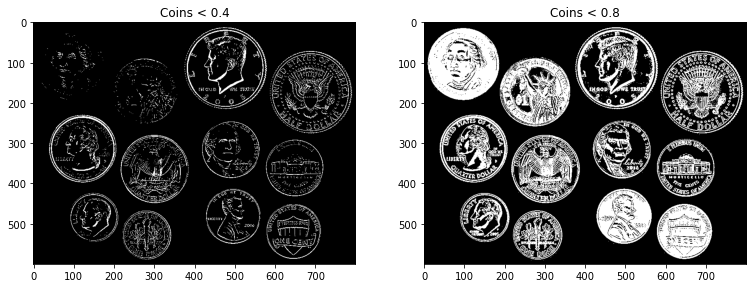

In [87]:
coins_4 = coins < 0.4

coins_8 = coins < 0.8

# Plotting segmentation
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(coins_4, cmap=plt.cm.gray)
ax[0].set_title('Coins < 0.4')

ax[1].imshow(coins_8, cmap=plt.cm.gray)
ax[1].set_title('Coins < 0.8')

plt.tight_layout()
plt.show()

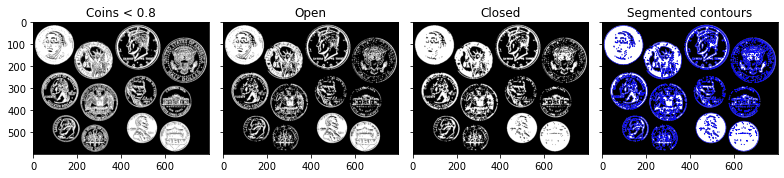

In [104]:
# Remove small white regions
open_coins = ndimage.binary_opening(coins_8)

# Remove small black hole
close_coins = ndimage.binary_closing(open_coins)

# Plotting segmentation
fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(11, 4))

ax[0].imshow(coins_8, cmap=plt.cm.gray)
ax[0].set_title('Coins < 0.8')

ax[1].imshow(open_coins, cmap=plt.cm.gray)
ax[1].set_title('Open')

ax[2].imshow(close_coins, cmap=plt.cm.gray)
ax[2].set_title('Closed')

ax[3].imshow(close_coins, cmap=plt.cm.gray)
ax[3].contour(close_coins, [0.5], linewidths=0.5, colors='b')
ax[3].set_title('Segmented contours')

plt.tight_layout()
plt.show()

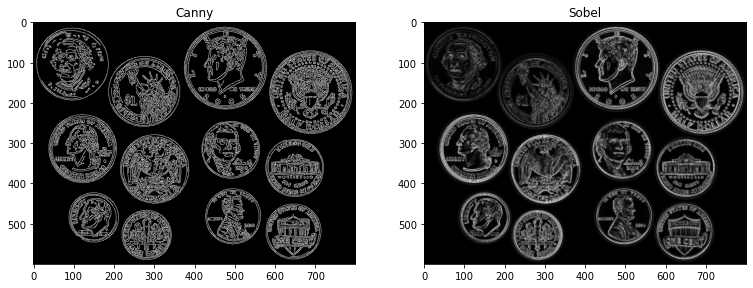

In [63]:
from skimage.feature import canny
from skimage.filters import sobel

canny_coins = canny(coins/2.)

sobel_coins = sobel(coins)

fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(11, 4))

ax[0].imshow(canny_coins, cmap=plt.cm.gray)
ax[0].set_title('Canny')

ax[1].imshow(sobel_coins, cmap=plt.cm.gray)
ax[1].set_title('Sobel')

plt.tight_layout()
plt.show()

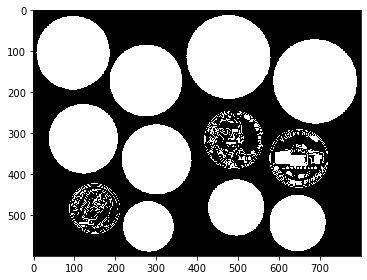

In [64]:
from skimage.io import imshow

from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(canny_coins)
imshow(fill_coins)